In [3723]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import  SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score,precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score


## Exporting the data path from the files

In [3724]:
data_path = Path.cwd().parent / 'data' / 'raw' / 'dataset.csv'
df = pd.read_csv(data_path)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3725]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3726]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [3727]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [3728]:
df.shape

(614, 13)

## Data Cleaning

In [3729]:
df.Loan_ID.nunique()

614

In [3730]:
df.duplicated().sum()

np.int64(0)

In [3731]:
df.Gender.value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [3732]:
df.Married.value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [3733]:
df.Dependents.value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [3734]:
df.Education.value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [3735]:
df.Self_Employed.value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [3736]:
df.Property_Area.value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [3737]:
df.Loan_Status.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [3738]:
df.Loan_Status.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

## Dealing with Null Data

In [3739]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [3740]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])
df[num_cols]  = imputer.transform(df[num_cols]) 
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [3741]:
cat_cols = df.select_dtypes(include=['object']).columns

for cols in cat_cols:
    df[cols].fillna(df[cols].mode()[0], inplace=True)
df.isnull().sum()

C:\Users\TUF F16\AppData\Local\Temp\ipykernel_22928\2873705791.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[cols].fillna(df[cols].mode()[0], inplace=True)


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

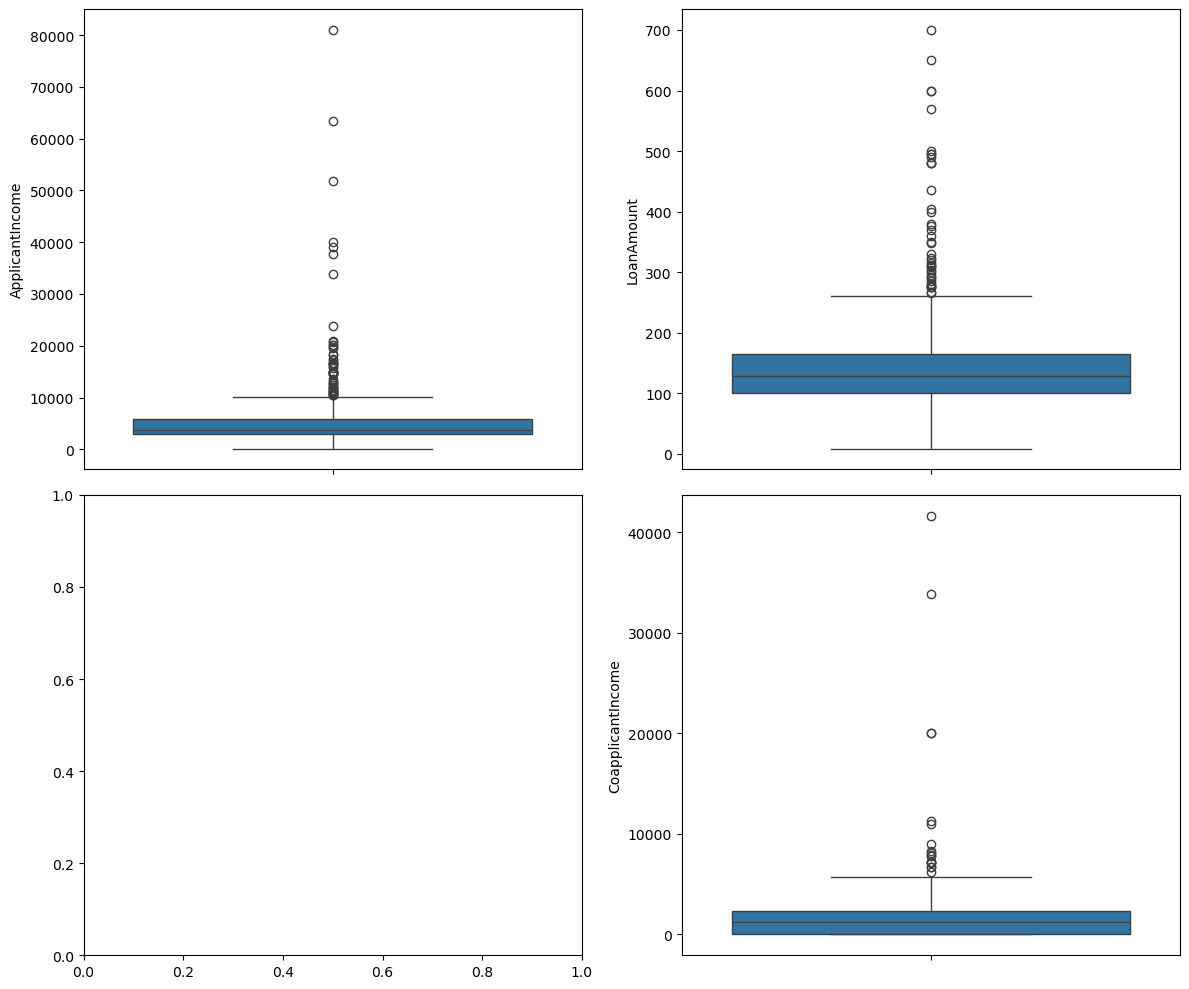

In [3742]:
fig, axes = plt.subplots(2,2, figsize=(12,10))

sns.boxplot(y=df['ApplicantIncome'], ax=axes[0,0])
sns.boxplot(y=df['LoanAmount'], ax=axes[0,1])
sns.boxplot(y=df['CoapplicantIncome'], ax=axes[1,1])

plt.tight_layout()
plt.show()

<Axes: xlabel='Dependents', ylabel='count'>

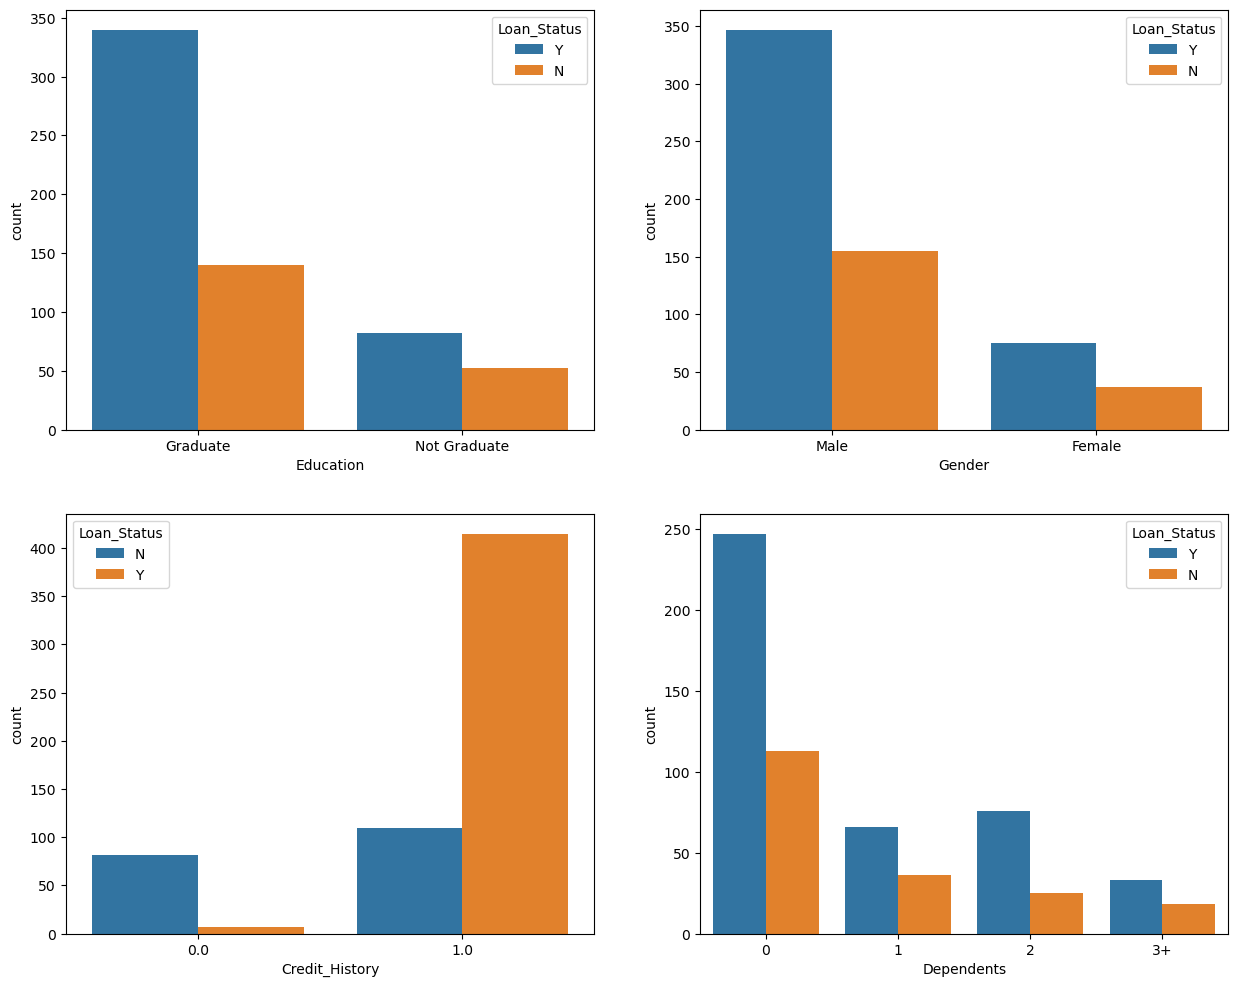

In [3743]:
fig,axes = plt.subplots(2,2,figsize=(15,12))

sns.countplot(x=df.Education,hue=df.Loan_Status,data=df,ax=axes[0,0])
sns.countplot(x=df.Gender,hue=df.Loan_Status,data=df,ax=axes[0,1])
sns.countplot(x=df.Credit_History,hue=df.Loan_Status,data=df,ax=axes[1,0])
sns.countplot(x=df.Dependents,hue=df.Loan_Status,data=df,ax=axes[1,1])


### Credit_History vs Loan_Status
Applicants with Credit_History = 1 have a much higher approval rate.
Applicants with Credit_History = 0 are mostly rejected.
### ducation vs Loan_Status
Graduates tend to have a slightly higher approval rate.
But the difference is not big
### Gender vs Loan_Status
Male applicants appear more frequently (dataset imbalance).
Approval rate difference between male and female is small.
### Dependents vs Loan_Status
Applicants with 0–2 dependents show similar approval rates.
3 dependents may show slightly lower approval.


<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

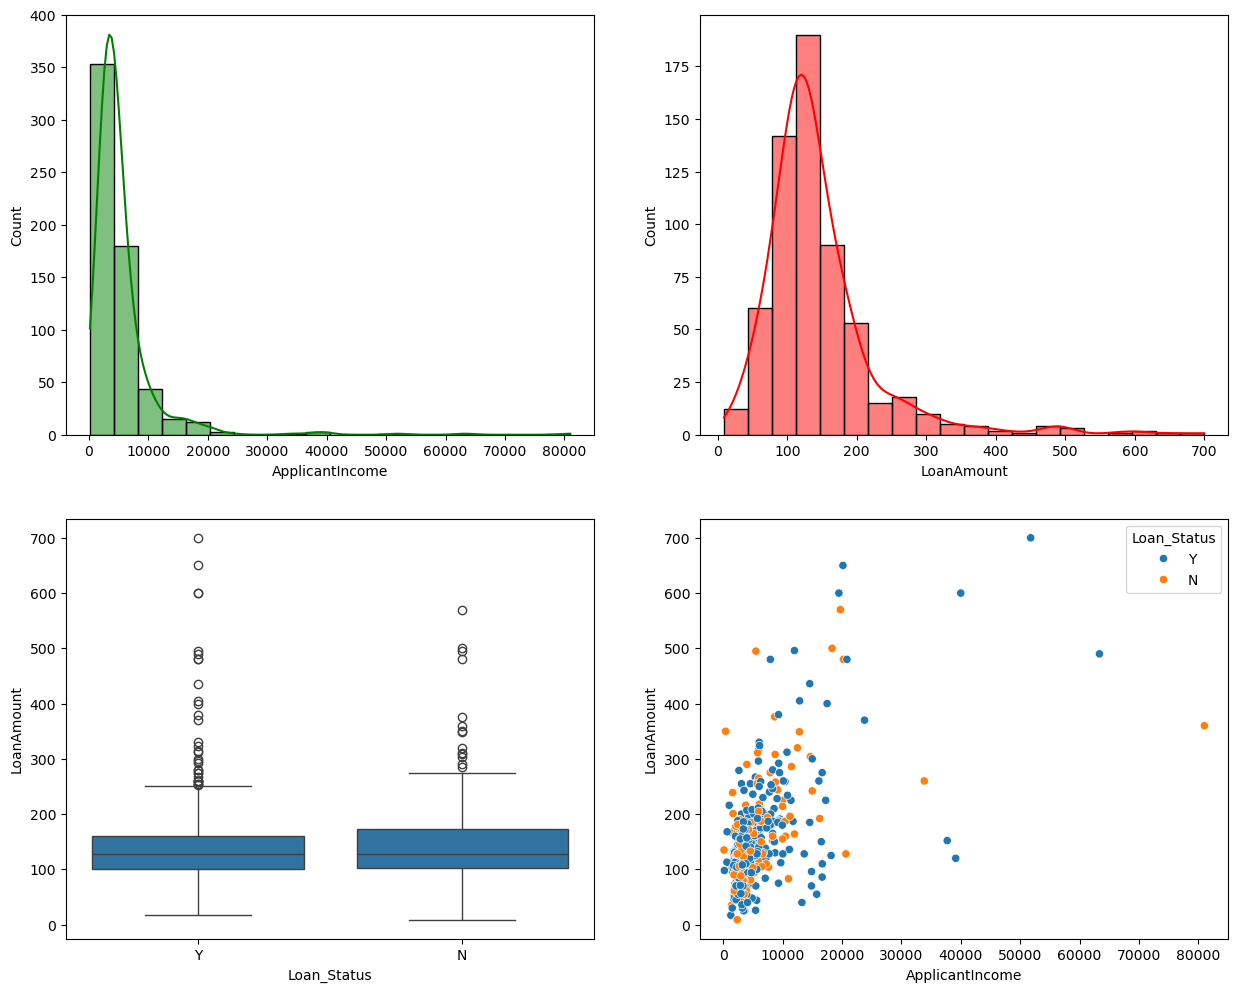

In [3744]:
fg,axes = plt.subplots(2,2,figsize=(15,12))
sns.histplot(df['ApplicantIncome'],kde=True,bins=20,color='green',ax=axes[0,0])
sns.histplot(df['LoanAmount'], kde=True,bins=20,color='red',ax=axes[0,1])
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df,ax=axes[1,0])
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df,ax=axes[1,1])




### ApplicantIncome Distribution
Highly right-skewed distribution
Extreme values exist then it needs outlier handling
### LoanAmount Distribution
Right-skewed
Some very high loan amounts
Possible risk increase with high loan amount
### ApplicantIncome vs LoanAmount
Some low-income applicants request high loans which cause rejection
Income-to-loan ratio matters


<Axes: xlabel='Property_Area', ylabel='count'>

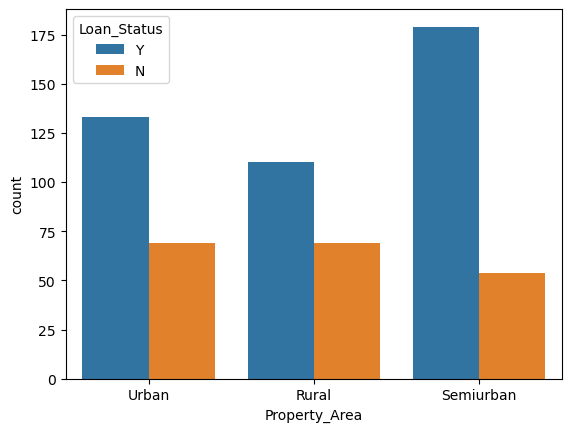

In [3745]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)

### Property_Area vs Loan_Status
Semi-Urban areas often have higher approval rates

## Feature Engineering

In [3746]:
df['Monthly_Installment'] = df['LoanAmount'] / df['Loan_Amount_Term']
df['Log_ApplicantIncome'] = np.log1p(df['ApplicantIncome'])
df['Log_LoanAmount']      = np.log1p(df['LoanAmount'])
df['Total_Income']        = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Income_Loan_Ratio']   = df['Total_Income'] / (df['LoanAmount'] + 1)
df = df.drop('Loan_ID', axis=1)


In [3747]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Property_Area'] = df['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Monthly_Installment,Log_ApplicantIncome,Log_LoanAmount,Total_Income,Income_Loan_Ratio
0,1,0,0,1,0,5849.0,0.0,128.0,360.0,1.0,2,1,0.355556,8.674197,4.859812,5849.0,45.341085
1,1,1,1,1,0,4583.0,1508.0,128.0,360.0,1.0,0,0,0.355556,8.430327,4.859812,6091.0,47.217054
2,1,1,0,1,1,3000.0,0.0,66.0,360.0,1.0,2,1,0.183333,8.006701,4.204693,3000.0,44.776119
3,1,1,0,0,0,2583.0,2358.0,120.0,360.0,1.0,2,1,0.333333,7.857094,4.795791,4941.0,40.834711
4,1,0,0,1,0,6000.0,0.0,141.0,360.0,1.0,2,1,0.391667,8.699681,4.955827,6000.0,42.253521


<Axes: >

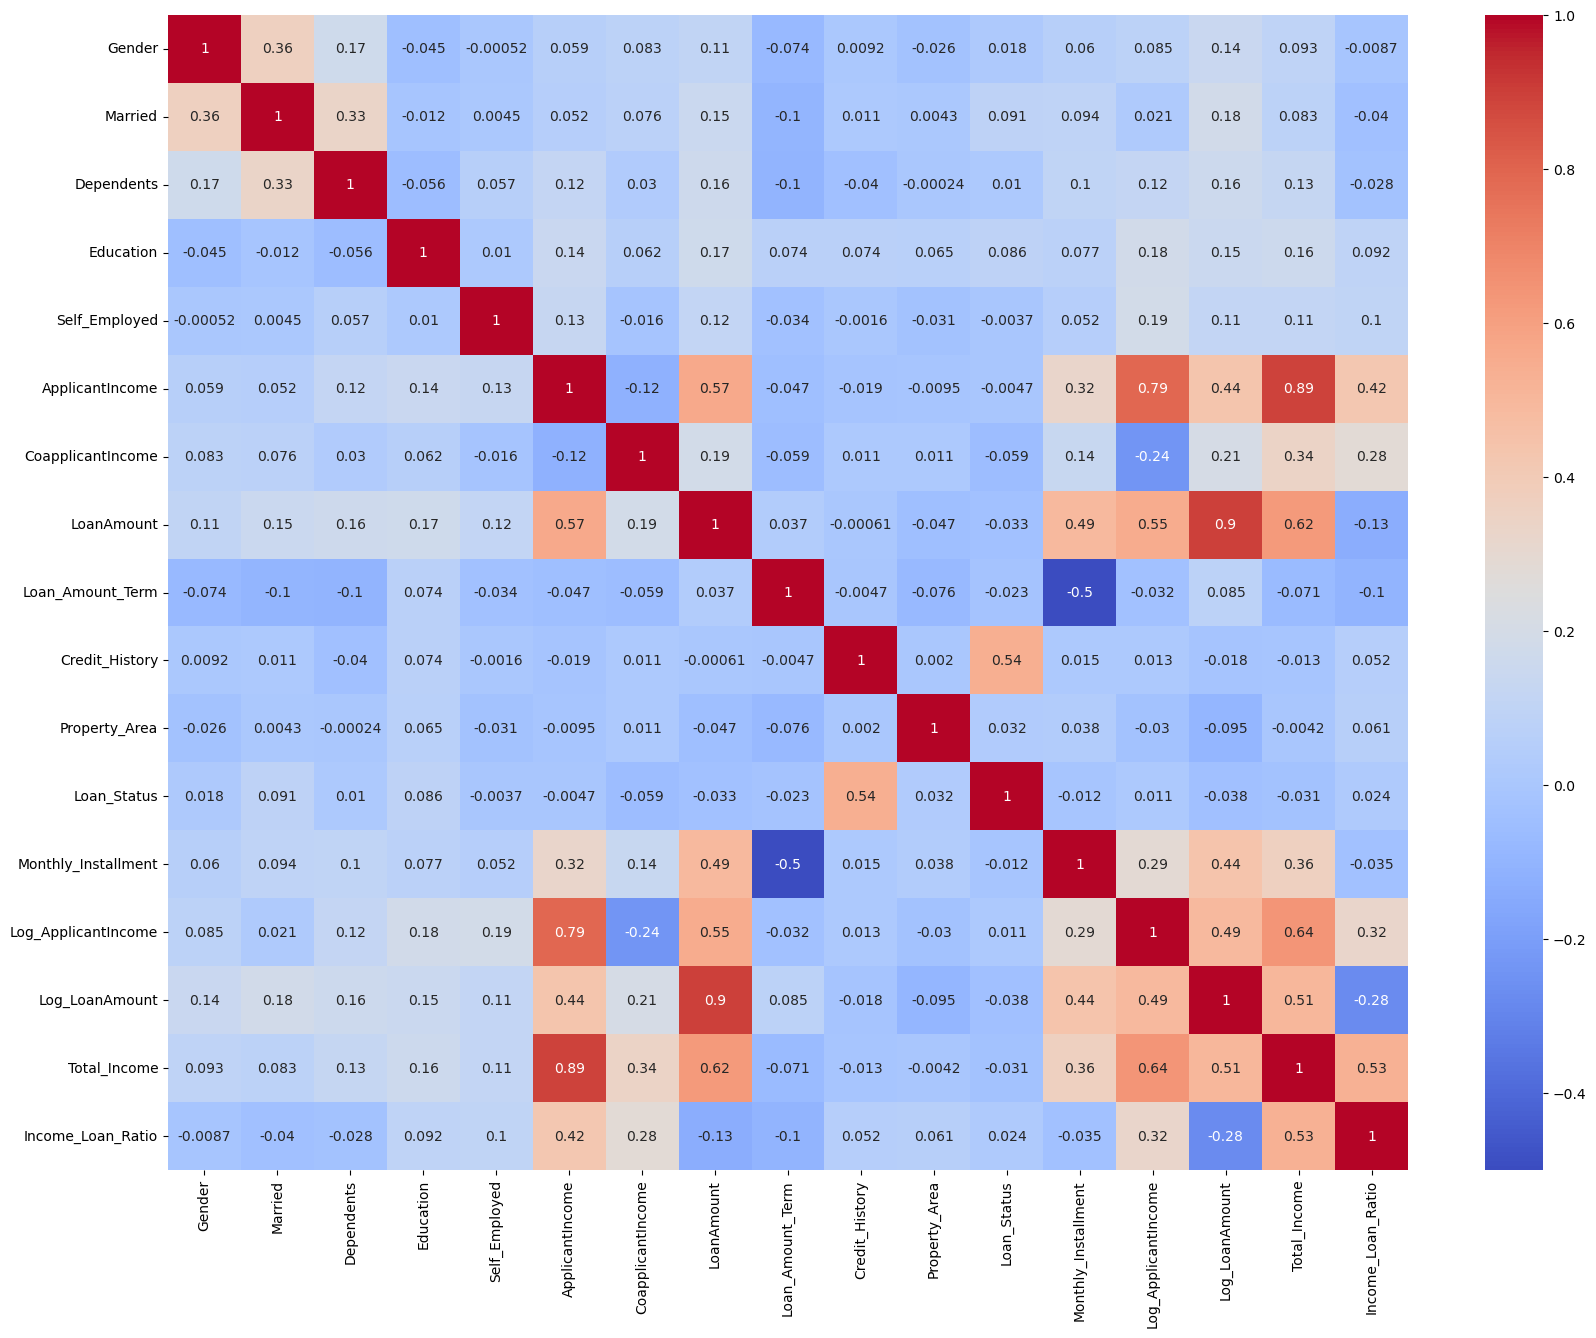

In [3748]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [3749]:
df.corr()['Loan_Status'].sort_values(ascending=False)

Loan_Status            1.000000
Credit_History         0.540556
Married                0.091478
Education              0.085884
Property_Area          0.032112
Income_Loan_Ratio      0.024399
Gender                 0.017987
Log_ApplicantIncome    0.010959
Dependents             0.010118
Self_Employed         -0.003700
ApplicantIncome       -0.004710
Monthly_Installment   -0.011757
Loan_Amount_Term      -0.022549
Total_Income          -0.031271
LoanAmount            -0.033214
Log_LoanAmount        -0.038242
CoapplicantIncome     -0.059187
Name: Loan_Status, dtype: float64

In [3750]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               614 non-null    int64  
 1   Married              614 non-null    int64  
 2   Dependents           614 non-null    int64  
 3   Education            614 non-null    int64  
 4   Self_Employed        614 non-null    int64  
 5   ApplicantIncome      614 non-null    float64
 6   CoapplicantIncome    614 non-null    float64
 7   LoanAmount           614 non-null    float64
 8   Loan_Amount_Term     614 non-null    float64
 9   Credit_History       614 non-null    float64
 10  Property_Area        614 non-null    int64  
 11  Loan_Status          614 non-null    int64  
 12  Monthly_Installment  614 non-null    float64
 13  Log_ApplicantIncome  614 non-null    float64
 14  Log_LoanAmount       614 non-null    float64
 15  Total_Income         614 non-null    flo

In [3751]:
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

In [3752]:
x,y=SMOTE().fit_resample(x,y)

In [3753]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('Loan_Status',axis=1),df['Loan_Status'],test_size=0.2,random_state=42)

In [3754]:
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Monthly_Installment,Log_ApplicantIncome,Log_LoanAmount,Total_Income,Income_Loan_Ratio
83,1,1,0,1,0,6000.0,2250.0,265.0,360.0,1.0,1,0.736111,8.699681,5.583496,8250.0,31.015038
90,1,1,0,1,0,2958.0,2900.0,131.0,360.0,1.0,1,0.363889,7.992607,4.882802,5858.0,44.378788
227,1,1,2,1,0,6250.0,1695.0,210.0,360.0,1.0,1,0.583333,8.740497,5.351858,7945.0,37.654028
482,1,1,0,1,0,2083.0,3150.0,128.0,360.0,1.0,1,0.355556,7.642044,4.859812,5233.0,40.565891
464,1,0,0,1,0,4166.0,0.0,98.0,360.0,0.0,1,0.272222,8.334952,4.595120,4166.0,42.080808


In [3755]:
k_scores = {}
for k in range(3, 50, 2):
    knn = Pipeline([
        ("scaler", StandardScaler()),
        ("model", KNeighborsClassifier(n_neighbors=k))
    ])
    score = cross_val_score(knn, x_train, y_train, cv=5, scoring='roc_auc').mean()
    k_scores[k] = score

best_k = max(k_scores, key=k_scores.get)
print(f"Best k: {best_k}")

Best k: 5


In [3756]:

models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(max_iter=1000, C=0.1, solver='saga'))
    ]),
    
    "Support Vector Machine": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SVC(
        probability=True, kernel='linear'))
    ]),
    
    "K-Nearest Neighbors": Pipeline([
        ("scaler", StandardScaler()),
        ("model", KNeighborsClassifier(n_neighbors=5))
    ]),
    
 "Decision Tree": DecisionTreeClassifier(
    max_depth=4,  
    min_samples_leaf=10,
    random_state=42
),
    
    "Random Forest": RandomForestClassifier(
    max_depth=6,
    n_estimators=200,
    min_samples_leaf=10,
    random_state=42
    ),
    
    "Gradient Boosting": GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,   
    max_depth=3,          
    subsample=0.8,       
    random_state=42    )
}


In [3757]:
def evaluate_models(X_train, X_test, y_train, y_test):
    results = []
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, y_prob)
        else:
            auc = np.nan
        
        results.append((name, acc, prec, rec, f1, auc))
    
    return results

In [3758]:
results = evaluate_models(x_train, x_test, y_train, y_test)

print("Model Performance:\n")

for name, acc, prec, rec, f1, auc in results:
    print(f"{name:25s} | "
          f"Accuracy: {acc:.4f} | "
          f"Precision: {prec:.4f} | "
          f"Recall: {rec:.4f} | "
          f"F1: {f1:.4f} | "
          f"ROC-AUC: {auc:.4f}")
        

print("\nBest Model:", max(results, key=lambda x: x[2])[0])


Model Performance:

Logistic Regression       | Accuracy: 0.7886 | Precision: 0.7596 | Recall: 0.9875 | F1: 0.8587 | ROC-AUC: 0.7247
Support Vector Machine    | Accuracy: 0.7886 | Precision: 0.7596 | Recall: 0.9875 | F1: 0.8587 | ROC-AUC: 0.6384
K-Nearest Neighbors       | Accuracy: 0.7805 | Precision: 0.7573 | Recall: 0.9750 | F1: 0.8525 | ROC-AUC: 0.6839
Decision Tree             | Accuracy: 0.8049 | Precision: 0.7979 | Recall: 0.9375 | F1: 0.8621 | ROC-AUC: 0.7360
Random Forest             | Accuracy: 0.7805 | Precision: 0.7624 | Recall: 0.9625 | F1: 0.8508 | ROC-AUC: 0.7564
Gradient Boosting         | Accuracy: 0.7886 | Precision: 0.7935 | Recall: 0.9125 | F1: 0.8488 | ROC-AUC: 0.7503

Best Model: Decision Tree
